In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [2]:
#Ruta a archivos de todo el anomaly detection
eadjets='antikT/R1/eadjets.pkl'
eadleadpT='antikT/R1/eadleadpT.pkl'
#Ruta a los archivos ya armados de las muestras
types=['background/','signal/','combined/']
algo=['-1/','0/','1/']
R=['0.4','0.5','1']
j='Muestras/'+types[2]+algo[0]+'alljetsR'+R[2]+'.pkl'
l='Muestras/'+types[2]+algo[0]+'leadpTR'+R[2]+'.pkl'
#Archivos con los constituyentes muestra 200 mil datos
ajets='ajets.pkl'
ajetsXYZE='ajetsXYZE.pkl'
cjets='cjets.pkl'
lpt='leadpt.pkl'
#Cargar los archivos deseados de Jets y leadpT
jets=pickle.load(open(ajets, 'rb'))
jetsXYZE=pickle.load(open(ajetsXYZE,'rb'))
subjets=pickle.load(open(cjets,'rb'))
leadpT=pickle.load(open(lpt,'rb'))

In [3]:
jetsXYZE

{'background': {0: {0: {'px': -1195.9301781079894,
    'py': -474.78326170135693,
    'pz': 240.06963161424423,
    'E': 1313.2904354495456},
   1: {'px': 1185.0550829874608,
    'py': 492.23967647028195,
    'pz': 83.45395978844432,
    'E': 1287.4819339361034}},
  1: {0: {'px': 276.07174442947957,
    'py': 1325.959157918069,
    'pz': 1251.2854184157172,
    'E': 1943.5598863819819},
   1: {'px': -283.4014670674781,
    'py': -1294.9654247595342,
    'pz': -1312.4205335695463,
    'E': 1916.3707438651938}},
  2: {0: {'px': -549.9642844029459,
    'py': 1083.3543717550237,
    'pz': -240.6325131293242,
    'E': 1396.8406541431486},
   1: {'px': 495.6844670551552,
    'py': -951.0372404647255,
    'pz': 154.78605277014034,
    'E': 1089.530630417991}},
  3: {0: {'px': -1267.5028219656342,
    'py': 212.71408746418362,
    'pz': 430.0930837244394,
    'E': 1450.4859258400668},
   1: {'px': 1157.2802985913065,
    'py': -386.9308645186745,
    'pz': 365.0326256143739,
    'E': 1285.6187

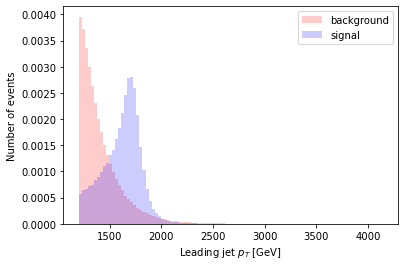

In [3]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
n,b,p = plt.hist(leadpT['background'][:], bins=100, facecolor='r', alpha=0.2,label='background',density=1)
plt.hist(leadpT['signal'], bins=b, facecolor='b', alpha=0.2,label='signal',density=1)
plt.xlabel(r'Leading jet $p_{T}$ [GeV]')
plt.ylabel('Number of events')
plt.legend(loc='upper right')
plt.savefig("leadjetpt")

In [5]:
mjj={}
for mytype in ['background','signal']:
    mjj[mytype]=[]
    for k in range(len(jetsXYZE[mytype])):
        E = jetsXYZE[mytype][k][0]['E']+jetsXYZE[mytype][k][1]['E']
        px = jetsXYZE[mytype][k][0]['px']+jetsXYZE[mytype][k][1]['px']
        py = jetsXYZE[mytype][k][0]['py']+jetsXYZE[mytype][k][1]['py']
        pz = jetsXYZE[mytype][k][0]['pz']+jetsXYZE[mytype][k][1]['pz']
        mjj[mytype]+=[(E**2-px**2-py**2-pz**2)**0.5]
        pass
    pass

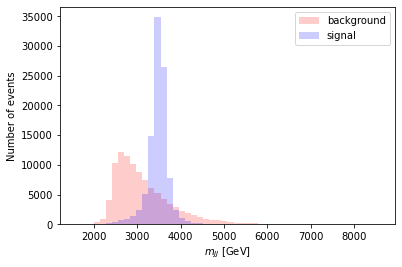

<Figure size 432x288 with 0 Axes>

In [6]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
n,b,p = plt.hist(mjj['background'], bins=50, facecolor='r', alpha=0.2,label='background')
plt.hist(mjj['signal'], bins=b, facecolor='b', alpha=0.2,label='signal')
plt.xlabel(r'$m_{JJ}$ [GeV]')
plt.ylabel('Number of events')
plt.legend(loc='upper right')
plt.show()
plt.savefig("mjj.pdf")

In [9]:
leadeta={}
leadeta['background']=np.zeros(len(jets['background']))
leadeta['signal']=np.zeros(len(jets['signal']))
for i in range(len(jets['background'])):
    leadeta['background'][i]=jets['background'][i][0]['eta']
for i in range(len(jets['signal'])):
    leadeta['signal'][i]=jets['signal'][i][0]['eta']

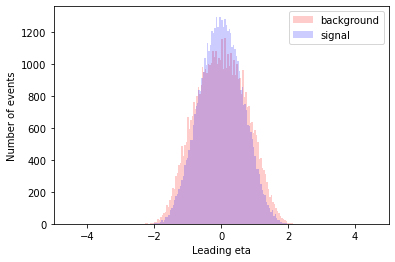

In [13]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.hist(leadeta['background'], bins=100, facecolor='r', alpha=0.2,label='background')
plt.hist(leadeta['signal'], bins=100, facecolor='b', alpha=0.2,label='signal')
plt.xlim(-5,5)
plt.xlabel(r'Leading eta')
plt.ylabel('Number of events')
plt.legend(loc='upper right')
#plt.savefig("leadeta")

In [16]:
subleadeta={}
subleadeta['background']=np.zeros(len(jets['background']))
subleadeta['signal']=np.zeros(len(jets['signal']))
for i in range(len(jets['background'])):
    subleadeta['background'][i]=jets['background'][i][1]['eta']
for i in range(len(jets['signal'])):
    subleadeta['signal'][i]=jets['signal'][i][1]['eta']

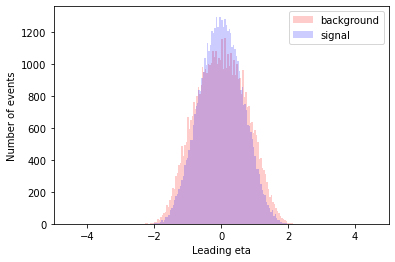

In [17]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.hist(subleadeta['background'], bins=100, facecolor='r', alpha=0.2,label='background')
plt.hist(subleadeta['signal'], bins=100, facecolor='b', alpha=0.2,label='signal')
plt.xlim(-5,5)
plt.xlabel(r'Leading eta')
plt.ylabel('Number of events')
plt.legend(loc='upper right')
#plt.savefig("leadeta")

In [3]:
thirdleadeta={}
thirdleadeta['background']=np.zeros(len(jets['background']))
thirdleadeta['signal']=np.zeros(len(jets['signal']))
for i in range(len(jets['background'])):
    thirdleadeta['background'][i]=jets['background'][i][2]['eta']
for i in range(len(jets['signal'])):
    thirdleadeta['signal'][i]=jets['signal'][i][2]['eta']

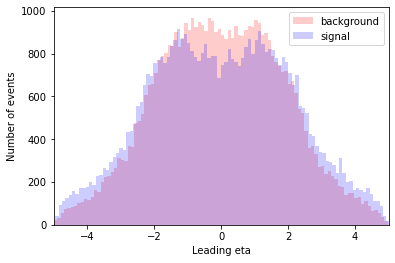

In [20]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.hist(thirdleadeta['background'], bins=100, facecolor='r', alpha=0.2,label='background')
plt.hist(thirdleadeta['signal'], bins=100, facecolor='b', alpha=0.2,label='signal')
plt.xlim(-5,5)
plt.xlabel(r'Leading eta')
plt.ylabel('Number of events')
plt.legend(loc='upper right')

In [22]:
jets['background']

{0: {0: {'pt': 1286.7276854490954,
   'eta': 0.18550794794312087,
   'phi': -2.763675891801303,
   'mass': 106.91212895959009},
  1: {'pt': 1283.2207326902046,
   'eta': 0.06498900849564969,
   'phi': 0.39368816771965853,
   'mass': 63.16421456404189},
  2: {'pt': 12.114359899025255,
   'eta': -4.4988075921909685,
   'phi': -2.232605274720931,
   'mass': 6.039480873758781},
  3: {'pt': 9.780048800115908,
   'eta': 2.1892153773279586,
   'phi': -0.9492895284309801,
   'mass': 4.3128018966636334},
  4: {'pt': 9.418518197480457,
   'eta': -1.2153049380238947,
   'phi': -0.09170645581563175,
   'mass': 3.4114451640498977},
  5: {'pt': 3.724740915675219,
   'eta': 0.4505174971813192,
   'phi': -1.256698544303105,
   'mass': 1.553965490892226},
  6: {'pt': 2.20098876953125,
   'eta': 3.249244451522827,
   'phi': -1.062229037284851,
   'mass': -1.6049041769309353e-07},
  7: {'pt': 2.148212250984621,
   'eta': -4.587750675557504,
   'phi': 2.5206670635642863,
   'mass': 1.082157971943412},
  8

In [12]:
for i in range(len(thirdleadeta['signal'])):
    if(thirdleadeta['signal'][i]>10):
        print(i,thirdleadeta['signal'][i])
        

25198 100000.0
37551 100000.0
46943 100000.0


In [13]:
thirdleadeta['signal'][25198]=0
thirdleadeta['signal'][37551]=0
thirdleadeta['signal'][46943]=0

In [3]:
for i in range(len(jets['background'])):
    for j in range(len(jets['background'][i])):
        if(jets['background'][i][j]['pt']<50.0):
            jets['background'][i].pop(j)
for i in range(len(jets['signal'])):
    for j in range(len(jets['signal'][i])):
        if(jets['signal'][i][j]['pt']<50.0):
            jets['signal'][i].pop(j)

In [6]:
jetnumber={}
jetnumber['background']=np.zeros(len(jets['background']))
jetnumber['signal']=np.zeros(len(jets['signal']))
for i in range(len(jetnumber['background'])):
    jetnumber['background'][i]=len(jets['background'][i])
for i in range(len(jetnumber['signal'])):
    jetnumber['signal'][i]=len(jets['signal'][i])

(array([18706., 19156.,  8996.,  2589.,   478.,    75.]),
 array([2., 3., 4., 5., 6., 7., 8.]),
 <BarContainer object of 6 artists>)

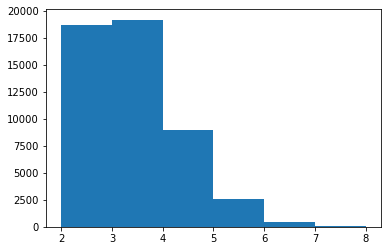

In [9]:
plt.hist(jetnumber['background'],bins=6)

(array([2.5858e+04, 1.7847e+04, 5.2110e+03, 9.5300e+02, 1.2000e+02,
        1.1000e+01]),
 array([2., 3., 4., 5., 6., 7., 8.]),
 <BarContainer object of 6 artists>)

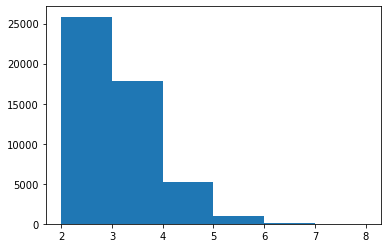

In [10]:
plt.hist(jetnumber['signal'],bins=6)
#plt.xlim(1,10)

In [4]:
jets1={}
jets1['background']=[]
jets1['signal']=[]
for mytype in ['background','signal']:
    for i in range(len(jets[mytype])):
        for j in range(len(jets[mytype][i])):
            jets1[]

{'background': {0: {0: {'pt': 1286.7276854490954,
    'eta': 0.18550794794312087,
    'phi': -2.763675891801303,
    'mass': 106.91212895959009},
   1: {'pt': 1283.2207326902046,
    'eta': 0.06498900849564969,
    'phi': 0.39368816771965853,
    'mass': 63.16421456404189}},
  1: {0: {'pt': 1354.3940698848066,
    'eta': 0.8265051414289109,
    'phi': 1.365523633651283,
    'mass': 614.2691080253145},
   1: {'pt': 1325.6137608136994,
    'eta': -0.8743185375384195,
    'phi': -1.786248193195,
    'mass': 439.0641503799008}},
  2: {0: {'pt': 1214.955723028443,
    'eta': -0.1967861241432713,
    'phi': 2.0405447772470127,
    'mass': 645.8656189739152},
   1: {'pt': 1072.4620849384437,
    'eta': 0.1438313316956345,
    'phi': -1.0903297249517028,
    'mass': 113.76883956668733}},
  3: {0: {'pt': 1285.2278734514618,
    'eta': 0.32869278722367534,
    'phi': 2.9753206708191486,
    'mass': 516.8352481167973},
   1: {'pt': 1220.2512788048011,
    'eta': 0.29485444697249424,
    'phi': -0